# Тюнинг линейной регрессии и ошибки

### О задании

В этом задании вы:
- обучите линейную регрессию, познакомитесь с метриками качества в задачах регресии

In [260]:
%pylab inline
import pandas as pd

from sklearn.base import BaseEstimator
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, Ridge

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## Часть 1. Линейная регрессия

Для начала загрузим данные и разделим их на обучающую и тестовую выборки в соотношении 7 к 3. Зачем так делать? Когда вы проверяете себя на данных на которых не обучались, вы можете быть уверены что не переобучились. Таким образом если качество на 70% датасета (оубчающей выборке) растёт, а на тестовой выборке падает, то модель начала запоминать датасет (переобучилась), вы что-то делаете не так.


In [261]:
data = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, train_size=0.7, random_state=241)

__Задание 1.__ Обучение линейной регрессии.

**(4 балла)**

Обучите линейную регрессию с $L_1$ (Lasso) и $L_2$ (Ridge) регуляризаторами (используйте параметры по умолчанию). Посмотрите, какое количество коэффициентов близко к 0 (степень близости к 0 определите сами из разумных пределов). Постройте график зависимости числа ненулевых коэффициентов от коэффицента регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$).

Спойлер - при большом гиперпараметре регуляризации все параметры стремятся к нулю. На графике это должно быть видно.

In [262]:
from sklearn import datasets, linear_model
from sklearn.linear_model import Ridge, Lasso
import numpy as np

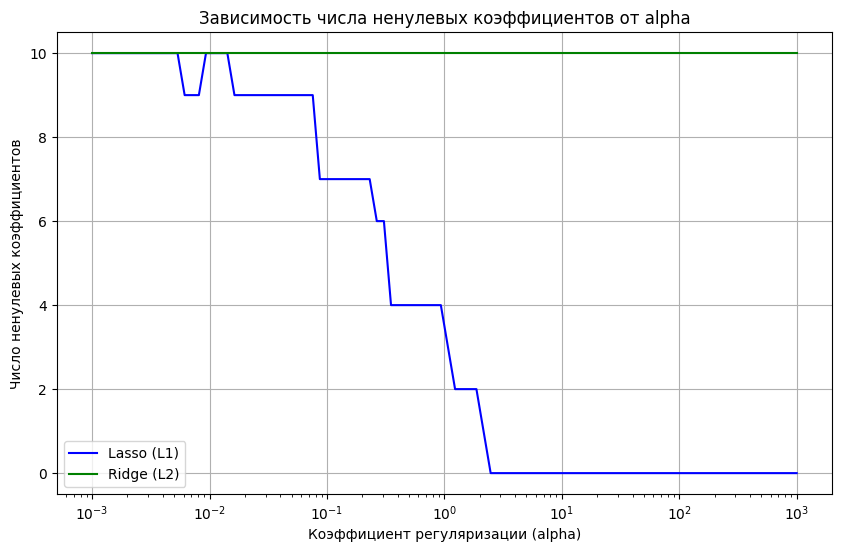

In [263]:
threshold = 1e-3

# Логарифмическая сетка значений alpha
alphas = np.logspace(-3, 3, 100)

# Списки для хранения количества ненулевых коэффициентов
lasso_nonzero = []
ridge_nonzero = []

# Перебор значений alpha и подсчёт количества коэффициентов, не близких к нулю
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    ridge = Ridge(alpha=alpha)

    lasso.fit(X_train, y_train)
    ridge.fit(X_train, y_train)

    lasso_nonzero.append(np.sum(np.abs(lasso.coef_) > threshold))
    ridge_nonzero.append(np.sum(np.abs(ridge.coef_) > threshold))

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(alphas, lasso_nonzero, label='Lasso (L1)', color='blue')
plt.plot(alphas, ridge_nonzero, label='Ridge (L2)', color='green')
plt.xscale('log')
plt.xlabel('Коэффициент регуляризации (alpha)')
plt.ylabel('Число ненулевых коэффициентов')
plt.title('Зависимость числа ненулевых коэффициентов от alpha')
plt.legend()
plt.grid(True)
plt.show()

Посчитайте для Ridge-регрессии следующие метрики: $RMSE$, $MAE$, $R^2$.

In [264]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [265]:
# code here

def getMetrics(ridge : Ridge, X_train, y_train, X_test, y_test):
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # r2_scores = cross_val_score(ridge, X_train, y_train, cv=5, scoring='r2')
    # y_pred = cross_val_predict(ridge, X_train, y_train, cv=5)

    # # Расчет метрик
    # rmse = np.sqrt(mean_squared_error(y_train, y_pred))  # RMSE
    # mae = mean_absolute_error(y_train, y_pred)  # MAE
    # r2 = np.mean(r2_scores)  # R²


    return [rmse, mae, r2]

ridge_default = Ridge()

rmse, mae, r2 = getMetrics(ridge_default, X_train, y_train, X_test, y_test)

# Вывод метрик
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R^2: {r2:.4f}")

RMSE: 58.3043
MAE: 49.6028
R^2: 0.3599


Подберите на обучающей выборке для Ridge-регрессии коэффициент регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$) для каждой из метрик. Постройте графики зависимости фукнции потерь от коэффициента регуляризации. Посчитайте те же метрики снова. Заметно ли изменилось качество?


Best alpha for RMSE: 0.08697
Best alpha for MAE: 0.02154
Best alpha for R^2: 0.08697


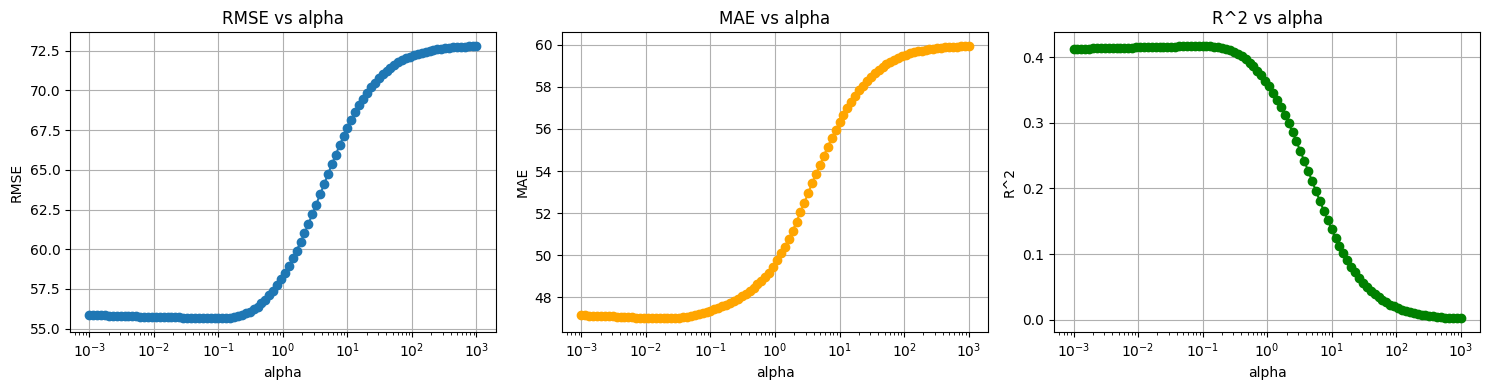

RMSE: 55.6391
MAE: 47.3174
R^2: 0.4171


In [266]:
def findBestAlphas(X_train, y_train, X_test, y_test):
    alphas = np.logspace(-3, 3, 100)
    rmse_list = []
    mae_list = []
    r2_list = []

    for alpha in alphas:
        ridge = Ridge(alpha=alpha)

        rmse, mae, r2 = getMetrics(ridge, X_train, y_train, X_test, y_test)
        
        rmse_list.append(rmse)
        mae_list.append(mae)
        r2_list.append(r2)

    # Нахождение лучших alpha
    best_alpha_rmse = alphas[np.argmin(rmse_list)]
    best_alpha_mae = alphas[np.argmin(mae_list)]
    best_alpha_r2 = alphas[np.argmax(r2_list)]

    return {'alpha_rmse' : best_alpha_rmse, "alpha_mae" : best_alpha_mae, "alpha_r2" : best_alpha_r2,
            'rmse' : rmse_list, 'mae' : mae_list, 'r2' : r2_list}

findingBest = findBestAlphas(X_train, y_train, X_test, y_test)
best_alpha_rmse = findingBest['alpha_rmse']
best_alpha_mae = findingBest['alpha_mae']

print(f"\nBest alpha for RMSE: {findingBest['alpha_rmse']:.5f}")
print(f"Best alpha for MAE: {findingBest['alpha_mae']:.5f}")
print(f"Best alpha for R^2: {findingBest['alpha_r2']:.5f}")

# Построение графиков зависимости метрик от alpha
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.plot(alphas, findingBest['rmse'], marker='o')
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('RMSE')
plt.title('RMSE vs alpha')
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(alphas, findingBest['mae'], marker='o', color='orange')
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('MAE')
plt.title('MAE vs alpha')
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(alphas, findingBest['r2'], marker='o', color='green')
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.title('R^2 vs alpha')
plt.grid(True)

plt.tight_layout()
plt.show()

# Финальная модель с лучшим alpha по RMSE
ridge_best = Ridge(alpha=findingBest['alpha_rmse'])
rmse, mae, r2 = getMetrics(ridge_best, X_train, y_train, X_test, y_test)

# Вывод метрик
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R^2: {r2:.4f}")

__Задание 2.__ Поиск объектов-выбросов

**(4 балла)**

Как известно, RMSE сильно штрафует за большие ошибки на объектах-выбросах. Посчитайте ошибки и посмотрите на их распределение (plt.hist). Что вы видите?

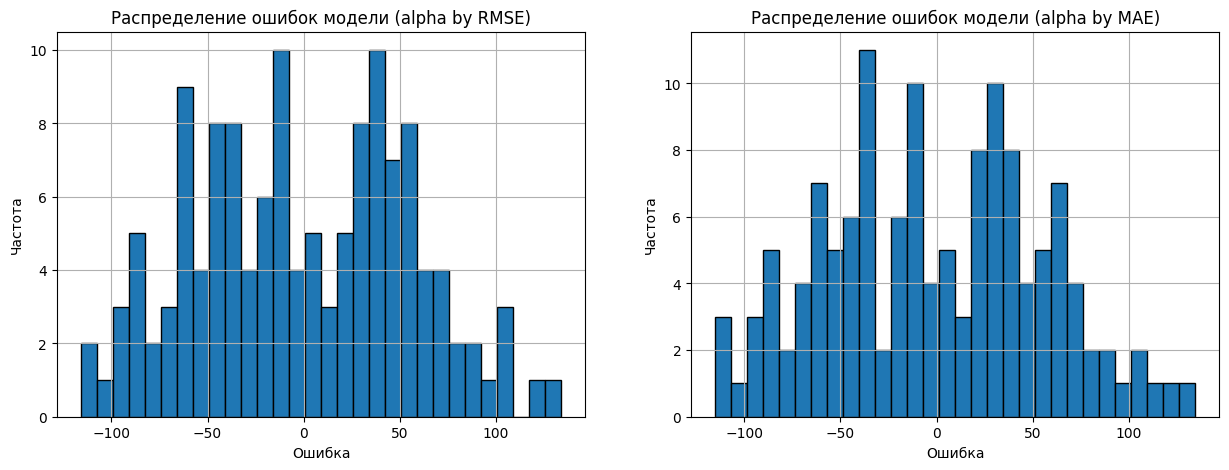

In [267]:
# code here
ridge_best_rmse = Ridge(alpha=best_alpha_rmse)
ridge_best_mae = Ridge(alpha=best_alpha_mae)

ridge_best_rmse.fit(X_train, y_train)
ridge_best_mae.fit(X_train, y_train)

y_pred_best_rmse = ridge_best_rmse.predict(X_test)
y_pred_best_mae = ridge_best_mae.predict(X_test)

# Анализ ошибок
errors_rmse = y_test - y_pred_best_rmse
errors_mae = y_test - y_pred_best_mae

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.hist(errors_rmse, bins=30, edgecolor="black")
plt.xlabel('Ошибка')
plt.ylabel('Частота')
plt.title('Распределение ошибок модели (alpha by RMSE)')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.hist(errors_mae, bins=30, edgecolor="black")
plt.xlabel('Ошибка')
plt.ylabel('Частота')
plt.title('Распределение ошибок модели (alpha by MAE)')
plt.grid(True)

plt.show()

Попробуйте удалить объекты-выбросы из обучающей выборки (что считать или не считать выбросами на ваше усмотрение). Обучите модель заново и посмотрите на качество на отложенной выборке (учитывайте, что там тоже могут быть выбросы, с которыми вы ничего не можете сделать). Стало ли лучше? Чем вы можете объяснить это?

In [268]:
iqr_hardness = 1
q1 = np.percentile(y_train, 25)
q3 = np.percentile(y_train, 75)
iqr = q3 - q1
lower_bound = q1 - iqr_hardness * iqr
upper_bound = q3 + iqr_hardness * iqr

mask = (y_train >= lower_bound) & (y_train <= upper_bound)
X_train_filtered = X_train[mask]
y_train_filtered = y_train[mask]
# from scipy.stats import zscore

# # Вычисление z-оценок
# z_scores = zscore(y_train)

# # Удаление выбросов по критерию |z| < 3
# mask = np.abs(z_scores) < 10
# X_train_filtered = X_train[mask]
# y_train_filtered = y_train[mask]


Ridge Regression (best alpha by RMSE) Metrics после удаления выбросов:
RMSE: 55.9987
MAE: 47.6071
R^2: 0.4095

Ridge Regression (best alpha by RMSE) Metrics после удаления выбросов:
RMSE: 56.0733
MAE: 47.3105
R^2: 0.4080


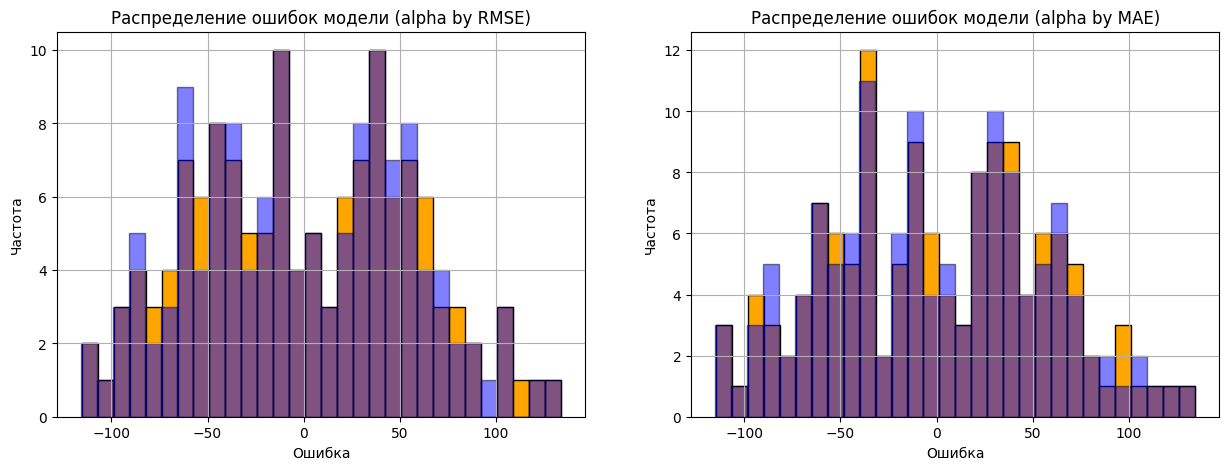

In [269]:
# Финальная модель с лучшим alpha по RMSE на очищенных данных
bestAlphas = findBestAlphas(X_train_filtered, y_train_filtered, X_test, y_test)
ridge_best_rmse = Ridge(alpha=bestAlphas['alpha_rmse'])
ridge_best_mae = Ridge(alpha=bestAlphas['alpha_mae'])

rmse_best_rmse, mae_best_rmse, r2_best_rmse = getMetrics(ridge_best_rmse, X_train_filtered, y_train_filtered, X_test, y_test)
rmse_best_mae, mae_best_mae, r2_best_mae = getMetrics(ridge_best_mae, X_train_filtered, y_train_filtered, X_test, y_test)

print(f"\nRidge Regression (best alpha by RMSE) Metrics после удаления выбросов:")
print(f"RMSE: {rmse_best_rmse:.4f}")
print(f"MAE: {mae_best_rmse:.4f}")
print(f"R^2: {r2_best_rmse:.4f}")

print(f"\nRidge Regression (best alpha by RMSE) Metrics после удаления выбросов:")
print(f"RMSE: {rmse_best_mae:.4f}")
print(f"MAE: {mae_best_mae:.4f}")
print(f"R^2: {r2_best_mae:.4f}")

# Анализ ошибок
ridge_best_rmse.fit(X_train_filtered, y_train_filtered)
ridge_best_mae.fit(X_train_filtered, y_train_filtered)

y_pred_rmse = ridge_best_rmse.predict(X_test)
y_pred_mae = ridge_best_mae.predict(X_test)

errors_rmse_filtered = y_test - y_pred_rmse
errors_mae_filtered = y_test - y_pred_mae

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.hist(errors_rmse_filtered, bins=30, edgecolor='black', color="orange")
plt.hist(errors_rmse, bins=30, edgecolor='black', alpha=0.5, color="blue")
plt.xlabel('Ошибка')
plt.ylabel('Частота')
plt.title('Распределение ошибок модели (alpha by RMSE)')
plt.grid(True)
plt.subplot(1, 2, 2)
plt.hist(errors_mae_filtered, bins=30, edgecolor='black', color="orange")
plt.hist(errors_mae, bins=30, edgecolor='black', alpha=0.5, color="blue")
plt.xlabel('Ошибка')
plt.ylabel('Частота')
plt.title('Распределение ошибок модели (alpha by MAE)')
plt.grid(True)

plt.show()

__Задание 3.__ Отчёт

**(2 балла)**

## **Отчет** 

### **Гиперпараметр регуляции** 
Параметр *Alpha* очень сильно влияет на обучении модели. Как показали данные задания, можно заметить, что в этом случае, лучше всего использовать меньшее *Alpha* 

### **Фильтрация данных**
Я так и не смог подобрать необходимые *параметры*, по которым можно попробовать отфильтровать. [ChatGPT](https://chatgpt.com/) предложил мне несколько способов фильтрации: 
1. __IQR(Interquartile Range)__ - это способ обнаружения выбросов в данных, основанный на статистике распределения. 
2. __Метод Z-score__ - метод, основанный на том, насколько далеко значение отклоняется от среднего в единицах стандартного отклонения   

Но поэксперементировав с этими методами, я не нашел ниодного, который уменьшал бы значение ошибки